In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import torch
import torch.nn as nn
import torchvision
from torchvision import models,transforms,datasets
import time
%matplotlib inline

In [2]:
torch.__version__

'1.8.2'

# 两个函数
dir():打开，看见<br />
help()：说明书

In [3]:
dir(torch) # 输出更小的工具箱们

['AVG',
 'AggregationType',
 'AnyType',
 'Argument',
 'ArgumentSpec',
 'BFloat16Storage',
 'BFloat16Tensor',
 'BenchmarkConfig',
 'BenchmarkExecutionStats',
 'Block',
 'BoolStorage',
 'BoolTensor',
 'BoolType',
 'BufferDict',
 'ByteStorage',
 'ByteTensor',
 'CONV_BN_FUSION',
 'CallStack',
 'Capsule',
 'CharStorage',
 'CharTensor',
 'ClassType',
 'Code',
 'CompilationUnit',
 'CompleteArgumentSpec',
 'ComplexDoubleStorage',
 'ComplexFloatStorage',
 'ComplexType',
 'ConcreteModuleType',
 'ConcreteModuleTypeBuilder',
 'CudaBFloat16StorageBase',
 'CudaBoolStorageBase',
 'CudaByteStorageBase',
 'CudaCharStorageBase',
 'CudaComplexDoubleStorageBase',
 'CudaComplexFloatStorageBase',
 'CudaDoubleStorageBase',
 'CudaFloatStorageBase',
 'CudaHalfStorageBase',
 'CudaIntStorageBase',
 'CudaLongStorageBase',
 'CudaShortStorageBase',
 'DeepCopyMemoTable',
 'DeviceObjType',
 'DictType',
 'DisableTorchFunction',
 'DoubleStorage',
 'DoubleTensor',
 'EnumType',
 'ErrorReport',
 'ExecutionPlan',
 'FUSE_AD

In [6]:
help(torch.cuda)

Help on package torch.cuda in torch:

NAME
    torch.cuda

DESCRIPTION
    This package adds support for CUDA tensor types, that implement the same
    function as CPU tensors, but they utilize GPUs for computation.
    
    It is lazily initialized, so you can always import it, and use
    :func:`is_available()` to determine if your system supports CUDA.
    
    :ref:`cuda-semantics` has more details about working with CUDA.

PACKAGE CONTENTS
    _utils
    amp (package)
    comm
    error
    graphs
    memory
    nccl
    nvtx
    profiler
    random
    sparse
    streams

CLASSES
    builtins.Exception(builtins.BaseException)
        DeferredCudaCallError
    builtins.RuntimeError(builtins.Exception)
        CudaError
    builtins.object
        BFloat16Tensor
        BoolTensor
        ByteTensor
        CharTensor
        DoubleTensor
        FloatTensor
        HalfTensor
        IntTensor
        LongTensor
        ShortTensor
        cudaStatus
        device
            dev

In [5]:
torch.cuda.is_available()

True

In [9]:
help(torch.cuda.is_available)

Help on function is_available in module torch.cuda:

is_available() -> bool
    Returns a bool indicating if CUDA is currently available.



# 加载数据
涉及两个类：Dataset、Dataloader
Dataset：提供一种方式去获取数据及其label，并告诉总共数据量多少...<br />
Dataloader：为后面的网络提供不同的数据形式。

In [34]:
from torch.utils.data import Dataset
from PIL import Image
import os

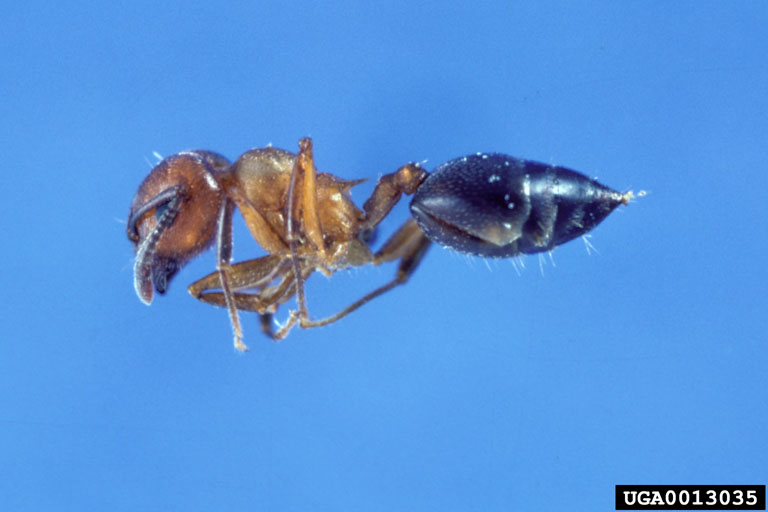

In [35]:
img=Image.open("./数据集/train/ants_image/0013035.jpg")
display(img)

In [36]:
dir_path="数据集/train/ants_image"
img_path_list=os.listdir(dir_path)
img_path_list

['0013035.jpg',
 '1030023514_aad5c608f9.jpg',
 '1095476100_3906d8afde.jpg',
 '1099452230_d1949d3250.jpg',
 '116570827_e9c126745d.jpg',
 '1225872729_6f0856588f.jpg',
 '1262877379_64fcada201.jpg',
 '1269756697_0bce92cdab.jpg',
 '1286984635_5119e80de1.jpg',
 '132478121_2a430adea2.jpg',
 '1360291657_dc248c5eea.jpg',
 '1368913450_e146e2fb6d.jpg',
 '1473187633_63ccaacea6.jpg',
 '148715752_302c84f5a4.jpg',
 '1489674356_09d48dde0a.jpg',
 '149244013_c529578289.jpg',
 '150801003_3390b73135.jpg',
 '150801171_cd86f17ed8.jpg',
 '154124431_65460430f2.jpg',
 '162603798_40b51f1654.jpg',
 '1660097129_384bf54490.jpg',
 '167890289_dd5ba923f3.jpg',
 '1693954099_46d4c20605.jpg',
 '175998972.jpg',
 '178538489_bec7649292.jpg',
 '1804095607_0341701e1c.jpg',
 '1808777855_2a895621d7.jpg',
 '188552436_605cc9b36b.jpg',
 '1917341202_d00a7f9af5.jpg',
 '1924473702_daa9aacdbe.jpg',
 '196057951_63bf063b92.jpg',
 '196757565_326437f5fe.jpg',
 '201558278_fe4caecc76.jpg',
 '201790779_527f4c0168.jpg',
 '2019439677_2db655d3

In [37]:
img_path_list[0]

'0013035.jpg'

In [38]:
Dataset??

In [41]:
class MyData(Dataset):
    def __init__(self,root_dir,label_dir):
        # rood_dir="数据集/train"
        # label_dir="ants_image"
        # 所以path=os.path.join(root_dir,label_dir)，一个简单的拼接
        self.root_dir=root_dir
        self.label_dir=label_dir
        self.path=os.path.join(self.root_dir,self.label_dir)
        self.img_path=os.listdir(self.path)        
        
    def __getitem__(self,idx):
        # 读取其中一个图片
        img_name=self.img_path[idx]
        img_item_path=os.path.join(self.root_dir,self.label_dir,img_name)
        img=Image.open(img_item_path)
        label=self.label_dir
        return img,label
    def __len__(self):
        # 告诉总共数据量多少...就是列表长度
        return len(self.img_path)

root_dir="数据集/train"
ants_label_dir="ants_image"
ants_dataset=MyData(root_dir,ants_label_dir)
     
        

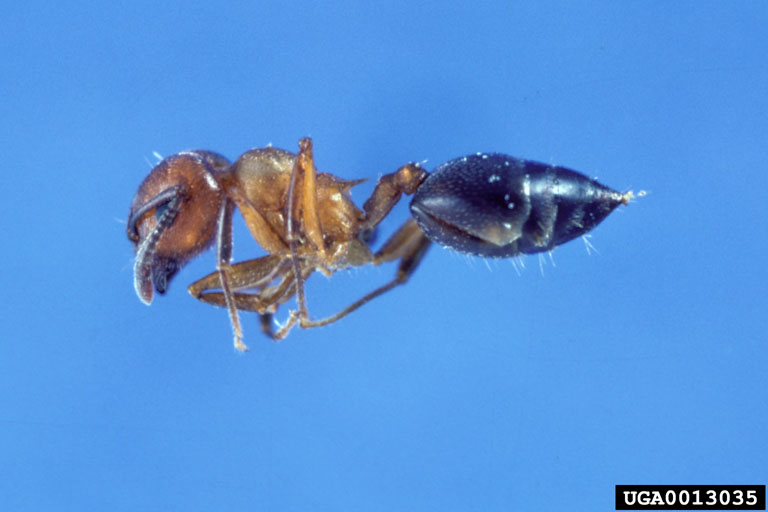

In [43]:
img,label=ants_dataset[0]   
display(img)

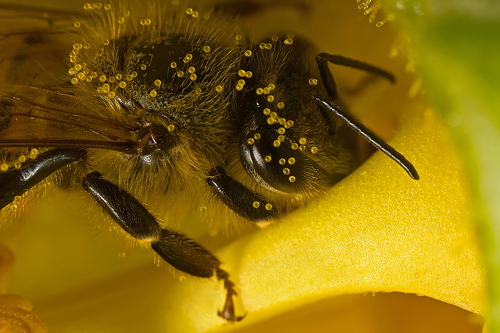

In [44]:
bees_label_dir="bees_image"
bees_dataset=MyData(root_dir,bees_label_dir)
img2,label2=bees_dataset[0]
display(img2)

In [45]:
train_dataset=ants_dataset+bees_dataset
len(ants_dataset)

124

In [46]:
len(bees_dataset)

121

In [47]:
len(train_dataset)

245

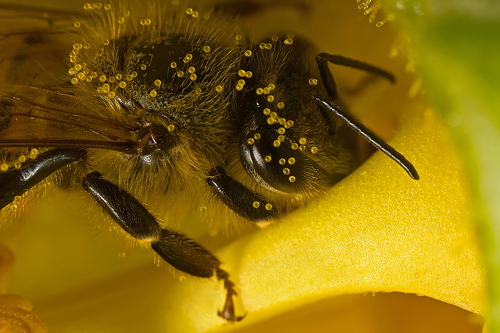

In [49]:
img,label=train_dataset[124]
display(img)